<a href="https://colab.research.google.com/github/nomozovkn/BigData/blob/main/Xudayberdiyeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1️⃣ Bosqich: Loyiha nomi va maqsadi

Nom: O‘zbekiston va dunyoda qayta tiklanuvchi energiya manbalari statistikasi.
Maqsad: So‘nggi yillardagi energiya ishlab chiqarish va iste’molini tahlil qilish, ulushining o‘sish tendensiyasini grafiklarda ko‘rsatish, kelgusi yillarga prognoz berish.

2 Kurubxonlarni import qilish

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


3 Malumot Yuklash Top 10 talik Va Ozbekiston

TOP-10 davlatlar va O‘zbekiston ( 2024 yil )
                             Entity       Umumiy
6404                          World  9868.107040
3514                  Non-OECD (EI)  5937.788630
299                            Asia  4895.526800
6124  Upper-middle-income countries  4762.392530
359               Asia Pacific (EI)  4723.728080
2074          High-income countries  3953.902230
3789                      OECD (EI)  3930.318320
1099                          China  3398.830530
1654                         Europe  1969.391670
1714                    Europe (EI)  1911.651070
6164                     Uzbekistan    13.029912


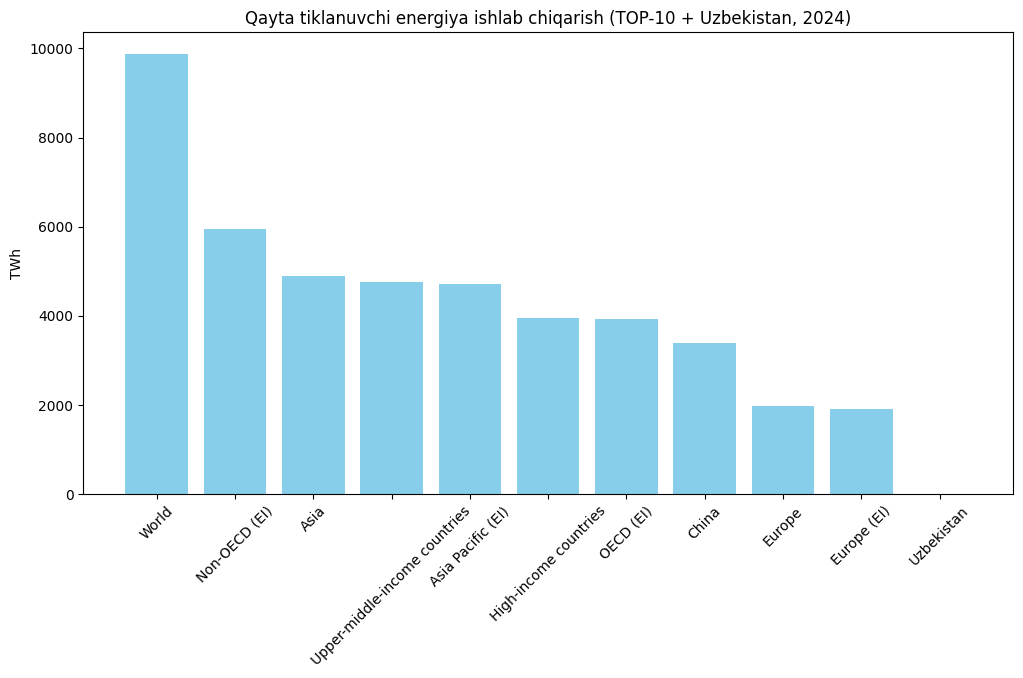

In [10]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt

# 1. Ma’lumotni yuklash
url = "https://ourworldindata.org/grapher/renewable-energy-gen.csv"
r = requests.get(url)
data = StringIO(r.text)
df = pd.read_csv(data)

# 2. Umumiy ishlab chiqarishni hisoblash
df["Umumiy"] = df[
    ["Solar generation - TWh",
     "Wind generation - TWh",
     "Hydro generation - TWh",
     "Other renewables (including geothermal and biomass) electricity generation - TWh"]
].sum(axis=1)

# 3. Oxirgi yilni olish (eng so‘nggi mavjud yil)
latest_year = df["Year"].max()
df_latest = df[df["Year"] == latest_year]

# 4. TOP-10 davlat (Umumiy ishlab chiqarish bo‘yicha)
top10 = df_latest.sort_values("Umumiy", ascending=False).head(10)

# 5. O‘zbekistonni qo‘shib olish
uzb = df_latest[df_latest["Entity"] == "Uzbekistan"]
result = pd.concat([top10, uzb])

print("TOP-10 davlatlar va O‘zbekiston (", latest_year, "yil )")
print(result[["Entity", "Umumiy"]])

# 6. Grafik chizish
plt.figure(figsize=(12,6))
plt.bar(result["Entity"], result["Umumiy"], color="skyblue")
plt.xticks(rotation=45)
plt.ylabel("TWh")
plt.title(f"Qayta tiklanuvchi energiya ishlab chiqarish (TOP-10 + Uzbekistan, {latest_year})")
plt.show()


Jadvalni Korish

In [11]:
result[["Entity", "Umumiy"]]


,Entity,Umumiy
6404,World,9868.107040
3514,Non-OECD (EI),5937.788630
299,Asia,4895.526800
6124,Upper-middle-income countries,4762.392530
359,Asia Pacific (EI),4723.728080
2074,High-income countries,3953.902230
3789,OECD (EI),3930.318320
1099,China,3398.830530
1654,Europe,1969.391670
1714,Europe (EI),1911.651070


from matplotlib import pyplot as plt
_df_12['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Umumiy'].plot(kind='hist', bins=20, title='Umumiy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='index', y='Umumiy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Umumiy'].plot(kind='line', figsize=(8, 4), title='Umumiy')
plt.gca().spines[['top', 'right']].set_visible(False)

Tanlangan davlatlar: ['World', 'Non-OECD (EI)', 'Asia', 'Upper-middle-income countries', 'Asia Pacific (EI)', 'Uzbekistan']


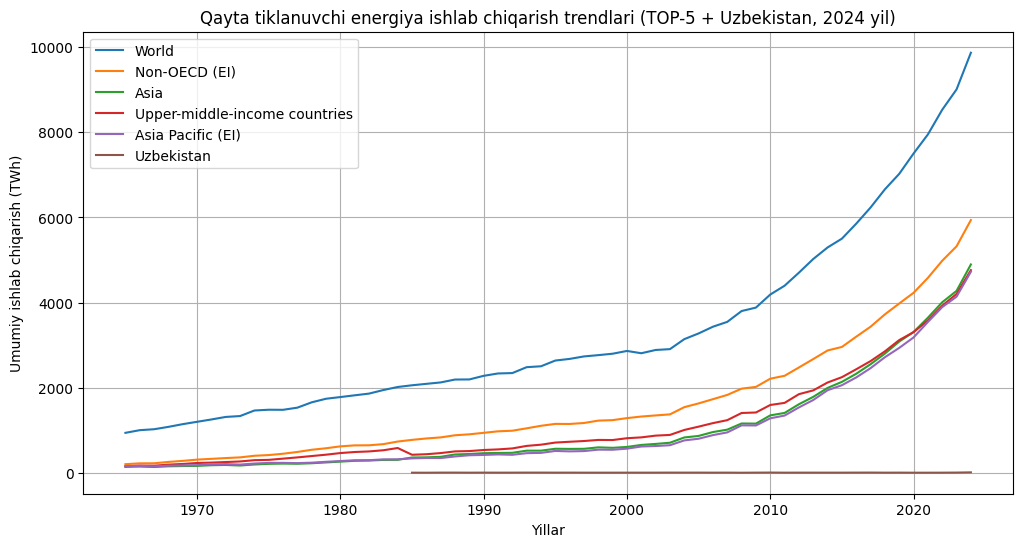

In [14]:
import matplotlib.pyplot as plt

# 1. Eng oxirgi yilni olish
latest_year = df["Year"].max()
df_latest = df[df["Year"] == latest_year]

# 2. Umumiy ishlab chiqarish bo‘yicha TOP-5 davlat
top5 = df_latest.sort_values("Umumiy", ascending=False).head(5)["Entity"].tolist()

# 3. O‘zbekistonni ham qo‘shib qo‘yish
countries = top5 + ["Uzbekistan"]

print("Tanlangan davlatlar:", countries)

# 4. Grafik chizish
plt.figure(figsize=(12,6))
for country in countries:
    temp = df[df["Entity"] == country]
    plt.plot(temp["Year"], temp["Umumiy"], label=country)

plt.xlabel("Yillar")
plt.ylabel("Umumiy ishlab chiqarish (TWh)")
plt.title(f"Qayta tiklanuvchi energiya ishlab chiqarish trendlari (TOP-5 + Uzbekistan, {latest_year} yil)")
plt.legend()
plt.grid(True)
plt.show()



In [15]:
# TOP-5 + Uzbekistan jadval
compare_df = df_latest[df_latest["Entity"].isin(countries)][["Entity", "Year", "Umumiy"]]

print(compare_df)


                             Entity  Year       Umumiy
299                            Asia  2024  4895.526800
359               Asia Pacific (EI)  2024  4723.728080
3514                  Non-OECD (EI)  2024  5937.788630
6124  Upper-middle-income countries  2024  4762.392530
6164                     Uzbekistan  2024    13.029912
6404                          World  2024  9868.107040


/tmp/ipython-input-2414046111.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compare_df, x="Entity", y="Umumiy", palette="viridis")


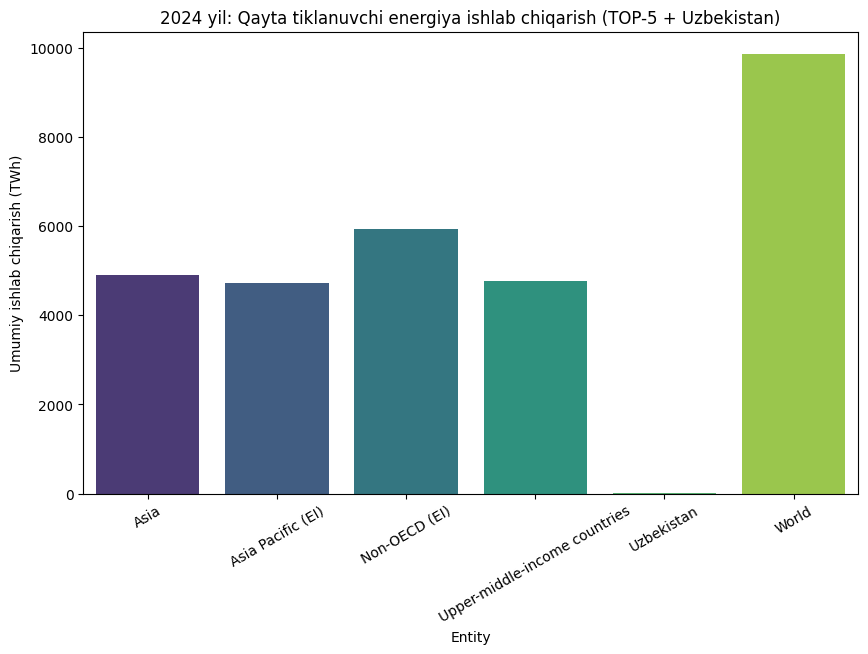

In [16]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=compare_df, x="Entity", y="Umumiy", palette="viridis")

plt.ylabel("Umumiy ishlab chiqarish (TWh)")
plt.title(f"{latest_year} yil: Qayta tiklanuvchi energiya ishlab chiqarish (TOP-5 + Uzbekistan)")
plt.xticks(rotation=30)
plt.show()


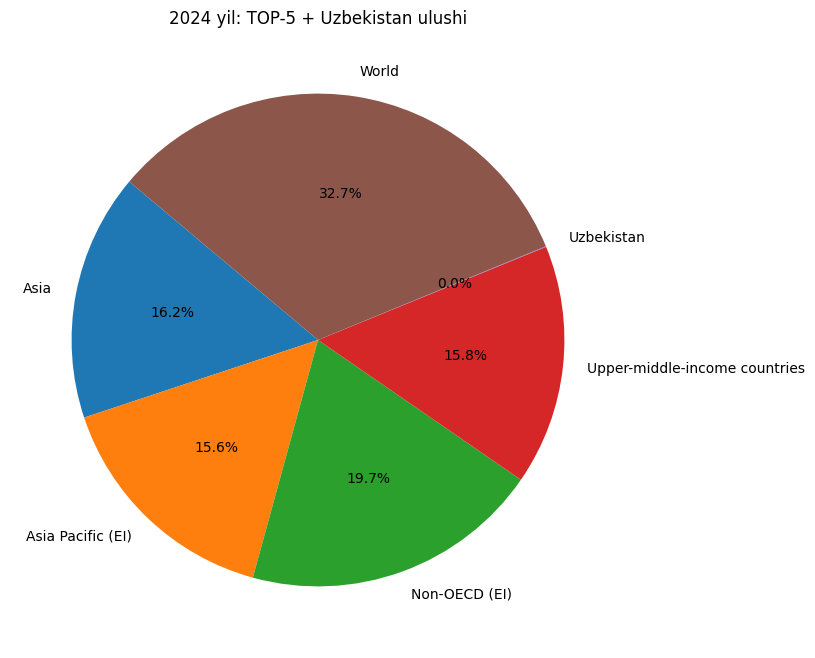

In [17]:
plt.figure(figsize=(8,8))
plt.pie(compare_df["Umumiy"], labels=compare_df["Entity"], autopct='%1.1f%%', startangle=140)
plt.title(f"{latest_year} yil: TOP-5 + Uzbekistan ulushi")
plt.show()


Qayta tiklanuvchi Energiyalarn chiqarish stacked Area

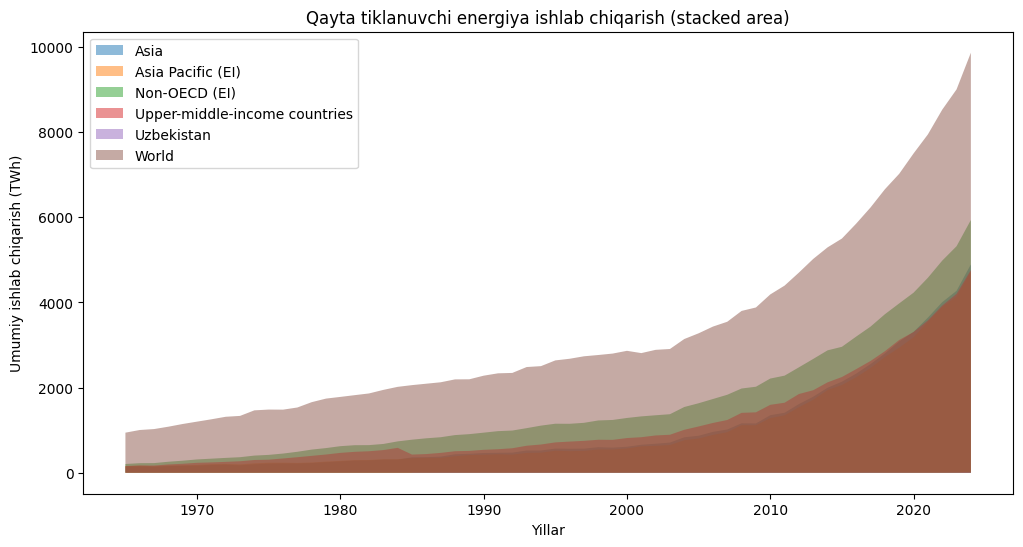

In [18]:
plt.figure(figsize=(12,6))
for country in compare_df["Entity"]:
    temp = df[df["Entity"] == country]
    plt.fill_between(temp["Year"], temp["Umumiy"], alpha=0.5, label=country)

plt.xlabel("Yillar")
plt.ylabel("Umumiy ishlab chiqarish (TWh)")
plt.title("Qayta tiklanuvchi energiya ishlab chiqarish (stacked area)")
plt.legend()
plt.show()


Donut chart (Pie chart varianti) diagramma olish

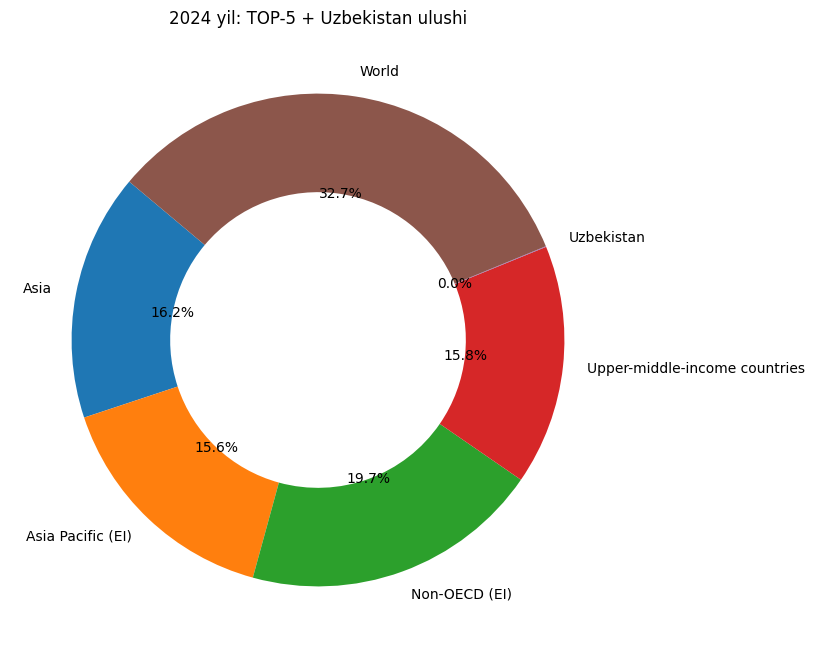

In [19]:
plt.figure(figsize=(8,8))
plt.pie(compare_df["Umumiy"], labels=compare_df["Entity"], autopct='%1.1f%%', startangle=140, wedgeprops={'width':0.4})
plt.title(f"{latest_year} yil: TOP-5 + Uzbekistan ulushi")
plt.show()


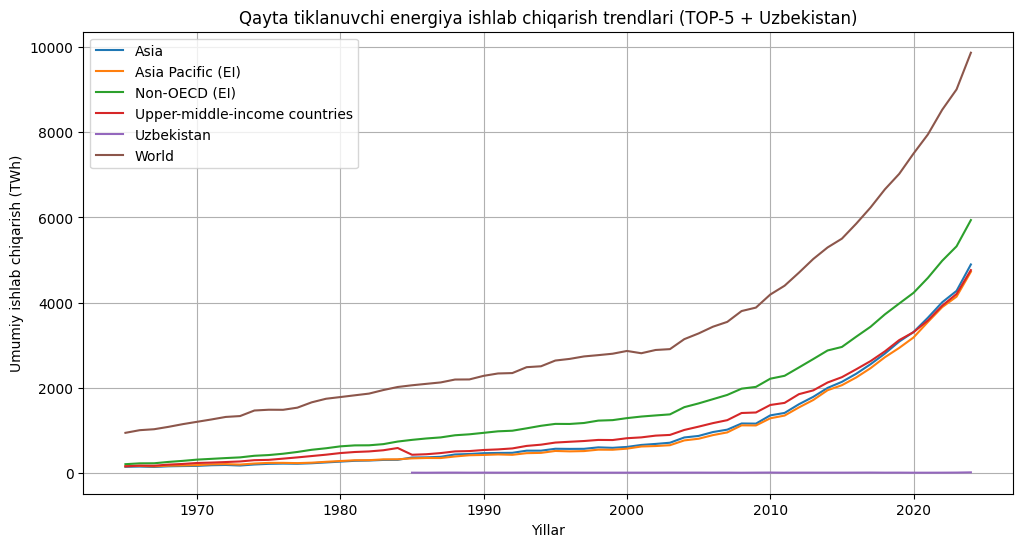

In [20]:
plt.figure(figsize=(12,6))
for country in compare_df["Entity"]:
    temp = df[df["Entity"] == country]
    plt.plot(temp["Year"], temp["Umumiy"], label=country)

plt.xlabel("Yillar")
plt.ylabel("Umumiy ishlab chiqarish (TWh)")
plt.title("Qayta tiklanuvchi energiya ishlab chiqarish trendlari (TOP-5 + Uzbekistan)")
plt.legend()
plt.grid(True)
plt.show()


Energiya turlari o‘rtasida korelyatsiya (Solar, Wind, Hydro, Other)

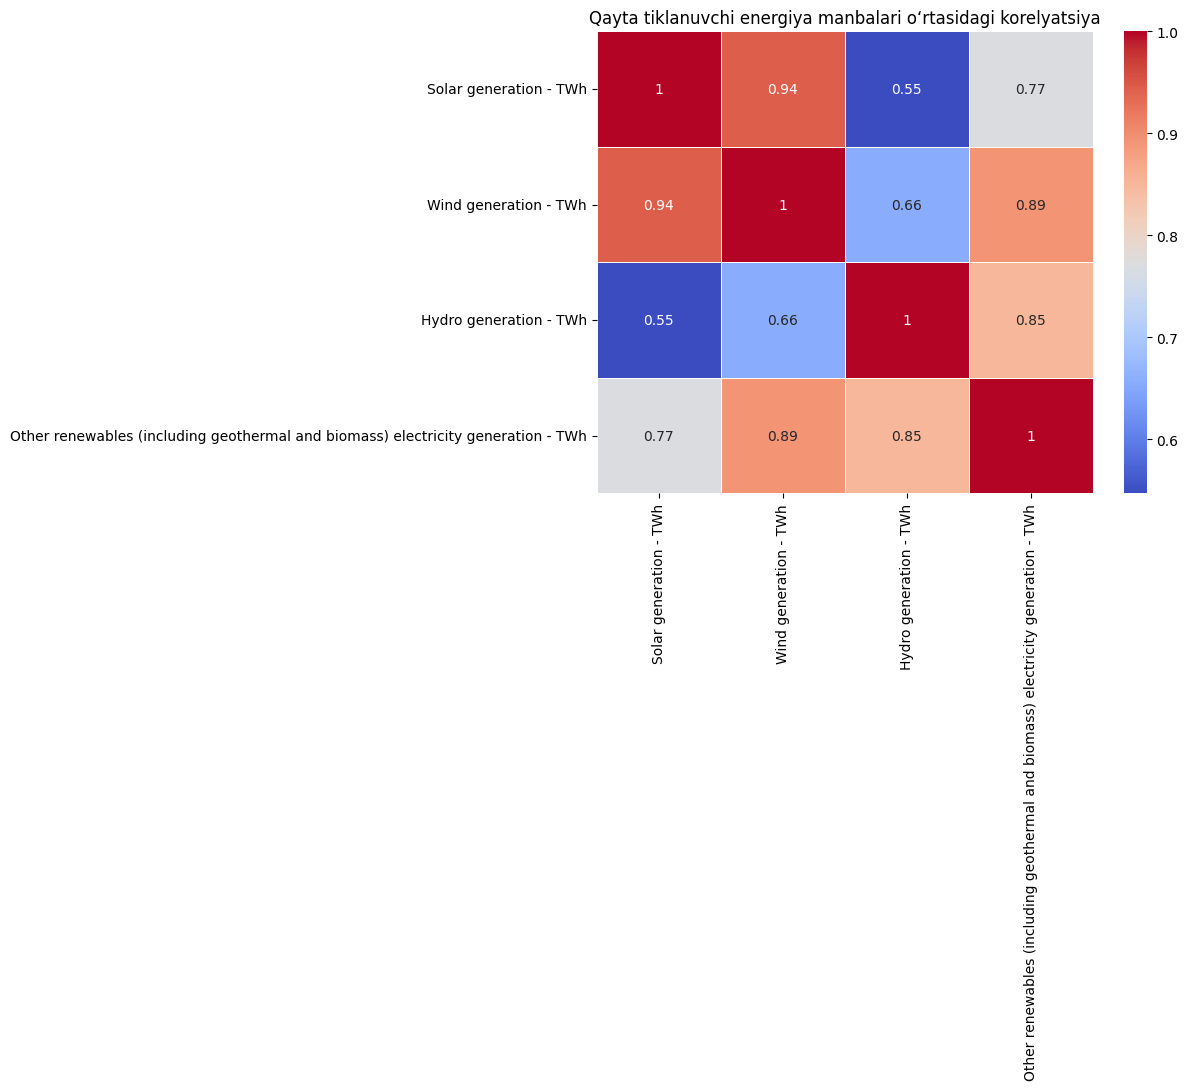

In [21]:
# Faqat kerakli ustunlarni olish
corr_df = df[["Solar generation - TWh",
              "Wind generation - TWh",
              "Hydro generation - TWh",
              "Other renewables (including geothermal and biomass) electricity generation - TWh"]]

# Korelyatsiya matritsasi
corr_matrix = corr_df.corr()

# Chizish
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Qayta tiklanuvchi energiya manbalari o‘rtasidagi korelyatsiya")
plt.show()


Pairplot (Vizual korelyatsiya)

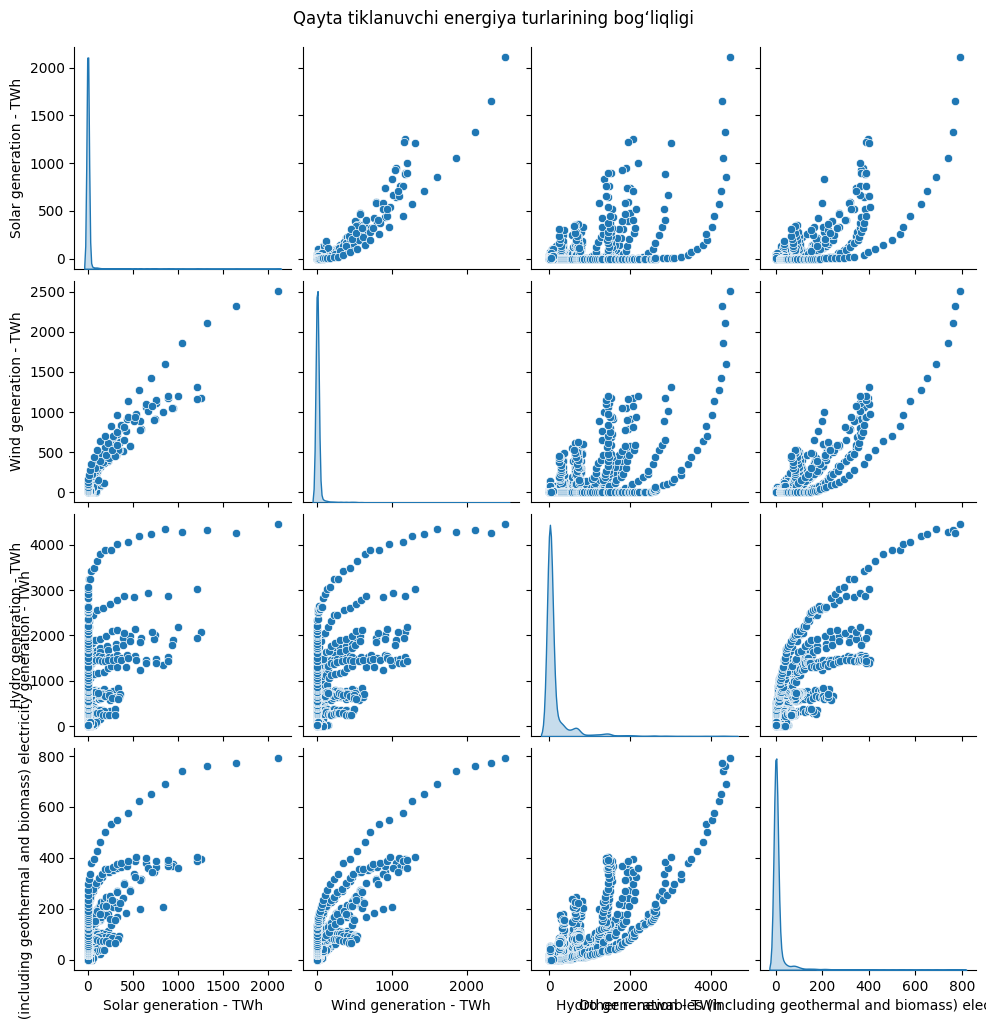

In [22]:
sns.pairplot(corr_df, diag_kind="kde")
plt.suptitle("Qayta tiklanuvchi energiya turlarining bog‘liqligi", y=1.02)
plt.show()


In [25]:
import pandas as pd
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/owid/energy-data/master/renewable-energy-gen.csv"
r = requests.get(url)
data = StringIO(r.text)

df = pd.read_csv(data)

# 🔍 Ustun nomlarini chiqaramiz
print(df.columns.tolist())

# Birinchi 5 qatorini ham ko‘rib chiqamiz
print(df.head())


['404: Not Found']
Empty DataFrame
Columns: [404: Not Found]
Index: []


In [28]:

import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
from prophet import Prophet

# Ma’lumotni URL dan olish
url = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
r = requests.get(url)
data = StringIO(r.text)
df = pd.read_csv(data)

# Ba’zi ustunlarni filtrlash: masalan, quyosh, shamol, gidro va boshqalar
# Ustun nomlarini ko‘rib chiqing
print(df.columns.tolist())
print(df.head())

# Misol: “solar_energy_generation” kabi ustun nomi bo‘lishi mumkin,
# sizga kerakli nomlarni moslashtiring.

# Masalan, quyidagi ustunlar bor bo‘lishi mumkin:
# df["solar_generation"] + df["wind_generation"] + ...

# Keyin diagramma va prognoz kodlarini yozing.


['country', 'year', 'iso_code', 'population', 'gdp', 'biofuel_cons_change_pct', 'biofuel_cons_change_twh', 'biofuel_cons_per_capita', 'biofuel_consumption', 'biofuel_elec_per_capita', 'biofuel_electricity', 'biofuel_share_elec', 'biofuel_share_energy', 'carbon_intensity_elec', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy', 'electricity_demand', 'electricity_demand_per_capita', 'electricity_generation', 'electricity_share_energy', 'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita', 'energy_per_gdp', 'fossil_cons_change_pct', 'fossil_cons_change_twh', 'fossil_elec_per_capita', 'fossil_electricity', 'fossil_energy_per_capita', 'fossil_fuel_consumption', 'fossil_share_elec', 'fossil_share_energy', 'gas_cons_change_pct', 'gas_cons_change_twh', 'gas_consu

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# 📥 Excel faylni yuklash
uploaded = files.upload()

# 📂 Fayl nomi to‘liq ko‘rsatilishi kerak
df = pd.read_excel("EI-Stats-Review-ALL-data.xlsx")

# Ustunlarni tekshirish
print(df.head())
print(df.columns)


Saving EI-Stats-Review-ALL-data.xlsx to EI-Stats-Review-ALL-data (1).xlsx
                                          Unnamed: 0
0  2025 Energy Institute Statistical Review of Wo...
1                                                NaN
2  This workbook contains information presented i...
3  Energy Institute Statistical Review of World E...
4                                       internet at:
Index(['Unnamed: 0'], dtype='object')


In [34]:
import pandas as pd

# Barcha sheet nomlarini ko‘ramiz
xls = pd.ExcelFile("EI-Stats-Review-ALL-data.xlsx")
print(xls.sheet_names)


['Contents', 'Total Energy Supply (TES) -EJ', 'TES by fuel', 'TES per Capita', 'CO2 from Energy', 'Natural Gas Flaring', 'CO2 from Flaring', 'CO2-Process Emissions, Methane', 'CO2e Emissions ', 'CCUS Capture Capacity', 'Carbon Prices', 'Oil - Proved reserves', 'Oil - Proved reserves history', 'Oil Production - barrels', 'Oil Production - tonnes', 'Crude+cond production - barrels', 'NGLs production - barrels', 'Liquids Consumption - barrels', 'Oil Consumption - barrels', 'Oil Consumption - Tonnes', 'Oil Consumption - EJ', 'Oil - Regional Consumption', 'Spot crude prices', 'Oil crude prices since 1861', 'Oil refinery - throughput', 'Oil refinery - capacity', 'Oil - Regional refining margins', 'Oil trade movements', 'Oil - Inter-area movements', 'Oil - Trade movements in 23-24', 'Gas - Proved reserves', 'Gas - Proved reserves history', 'Gas Production - Bcm', 'Gas Production - bcf', 'Gas Production - EJ', 'Gas Consumption - Bcm', 'Gas Consumption - Bcf', 'Gas Consumption - EJ', 'Gas - H2 

In [35]:
import pandas as pd

# TES jadvali
df_tes = pd.read_excel("EI-Stats-Review-ALL-data.xlsx", sheet_name="Total Energy Supply (TES) -EJ")
print("TES data:")
print(df_tes.head())

# Neft iste'moli
df_oil = pd.read_excel("EI-Stats-Review-ALL-data.xlsx", sheet_name="Oil Consumption - EJ")
print("Oil Consumption:")
print(df_oil.head())

# Gaz iste'moli
df_gas = pd.read_excel("EI-Stats-Review-ALL-data.xlsx", sheet_name="Gas Consumption - EJ")
print("Gas Consumption:")
print(df_gas.head())

# Ko‘mir iste'moli
df_coal = pd.read_excel("EI-Stats-Review-ALL-data.xlsx", sheet_name="Coal Consumption - EJ")
print("Coal Consumption:")
print(df_coal.head())

# Quyosh energiyasi
df_solar = pd.read_excel("EI-Stats-Review-ALL-data.xlsx", sheet_name="Solar Generation - TWh")
print("Solar Generation:")
print(df_solar.head())


TES data:
  Total energy supply*  Unnamed: 1   Unnamed: 2   Unnamed: 3   Unnamed: 4  \
0                  NaN         NaN          NaN          NaN          NaN   
1            Exajoules  1965.00000  1966.000000  1967.000000  1968.000000   
2                  NaN         NaN          NaN          NaN          NaN   
3               Canada     4.16867     4.400851     4.623239     4.965211   
4               Mexico     0.99353     1.046816     1.061961     1.152088   

    Unnamed: 5   Unnamed: 6   Unnamed: 7   Unnamed: 8   Unnamed: 9  ...  \
0          NaN          NaN          NaN          NaN          NaN  ...   
1  1969.000000  1970.000000  1971.000000  1972.000000  1973.000000  ...   
2          NaN          NaN          NaN          NaN          NaN  ...   
3     5.222350     5.613447     5.796121     6.192707     6.748374  ...   
4     1.267891     1.348802     1.426723     1.581068     1.712106  ...   

   Unnamed: 54  Unnamed: 55  Unnamed: 56  Unnamed: 57  Unnamed: 58  \
0     

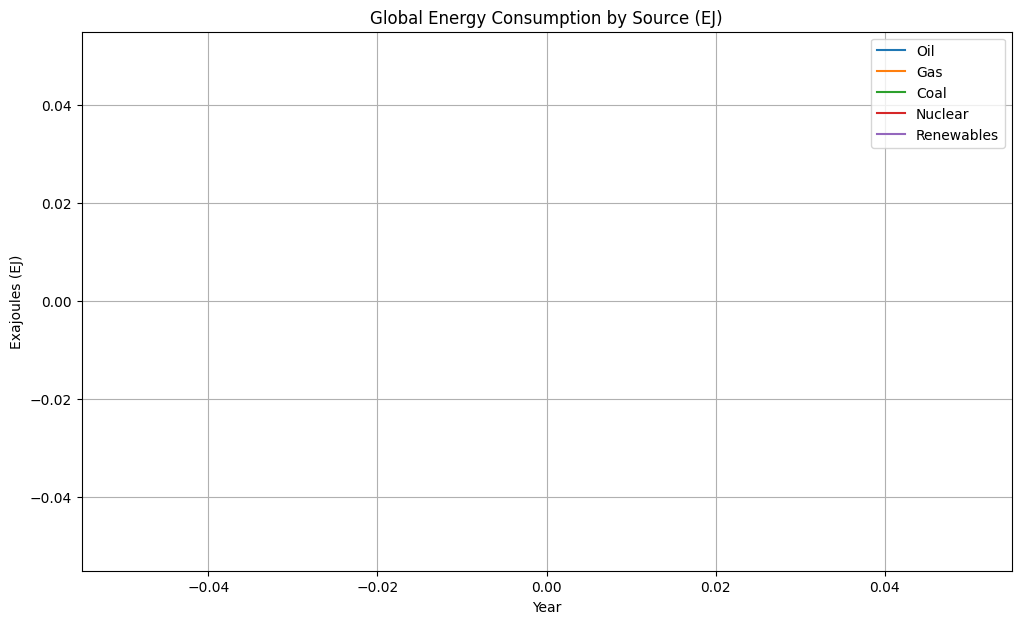

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

file = "EI-Stats-Review-ALL-data.xlsx"

# Neft, gaz, ko‘mir, atom va yashil energiya varaqalari
sheets = {
    "Oil": "Oil Consumption - EJ",
    "Gas": "Gas Consumption - EJ",
    "Coal": "Coal Consumption - EJ",
    "Nuclear": "Nuclear Consumption - EJ",
    "Renewables": "Renewables Consumption -EJ"
}

energy_data = {}

for name, sheet in sheets.items():
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.dropna(how="all").dropna(axis=1, how="all")

    # Birinchi ustunda mamlakat/davr, keyin yillar
    # Yillarni aniqlaymiz (raqamli ustunlar)
    year_cols = [c for c in df.columns if str(c).isdigit()]

    # Yillar bo‘yicha umumiy qiymat (barcha davlatlar yig‘indisi)
    total = df[year_cols].sum()
    energy_data[name] = total

# Umumiy grafik
plt.figure(figsize=(12,7))
for name, series in energy_data.items():
    plt.plot(series.index, series.values, label=name)

plt.title("Global Energy Consumption by Source (EJ)")
plt.xlabel("Year")
plt.ylabel("Exajoules (EJ)")
plt.legend()
plt.grid(True)
plt.show()


In [41]:
import pandas as pd

file = "EI-Stats-Review-ALL-data (1).xlsx"

# Sheet nomlarini ko‘ramiz
xls = pd.ExcelFile(file)
print(xls.sheet_names)

# Masalan, "Oil Consumption - EJ" ni o‘qiymiz
df_oil = pd.read_excel(file, sheet_name="Oil Consumption - EJ")
print(df_oil.head(10))


['Contents', 'Total Energy Supply (TES) -EJ', 'TES by fuel', 'TES per Capita', 'CO2 from Energy', 'Natural Gas Flaring', 'CO2 from Flaring', 'CO2-Process Emissions, Methane', 'CO2e Emissions ', 'CCUS Capture Capacity', 'Carbon Prices', 'Oil - Proved reserves', 'Oil - Proved reserves history', 'Oil Production - barrels', 'Oil Production - tonnes', 'Crude+cond production - barrels', 'NGLs production - barrels', 'Liquids Consumption - barrels', 'Oil Consumption - barrels', 'Oil Consumption - Tonnes', 'Oil Consumption - EJ', 'Oil - Regional Consumption', 'Spot crude prices', 'Oil crude prices since 1861', 'Oil refinery - throughput', 'Oil refinery - capacity', 'Oil - Regional refining margins', 'Oil trade movements', 'Oil - Inter-area movements', 'Oil - Trade movements in 23-24', 'Gas - Proved reserves', 'Gas - Proved reserves history', 'Gas Production - Bcm', 'Gas Production - bcf', 'Gas Production - EJ', 'Gas Consumption - Bcm', 'Gas Consumption - Bcf', 'Gas Consumption - EJ', 'Gas - H2 